<a href="https://colab.research.google.com/github/Muhammad-Huzifa/Neural-Networks-and-Deep-Learning-Using-Pytorch-and-Tensor-Flow/blob/main/Fasion_MNIST_dataset_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.optim as  optim
import torch.nn as nn

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle (4).json to kaggle (4).json


{'kaggle (4).json': b'{"username":"huzifaulhaq","key":"a951046cf71fbb107f227b75825e14a2"}'}

In [3]:
! pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/zalando-research/fashionmnist")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: huzifaulhaq
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist


100%|██████████| 68.8M/68.8M [00:04<00:00, 17.7MB/s]


In [5]:
 import pandas as pd

In [6]:
data = pd.read_csv('/content/fashionmnist/fashion-mnist_train.csv')

In [7]:
data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

In [9]:
torch.manual_seed(42)

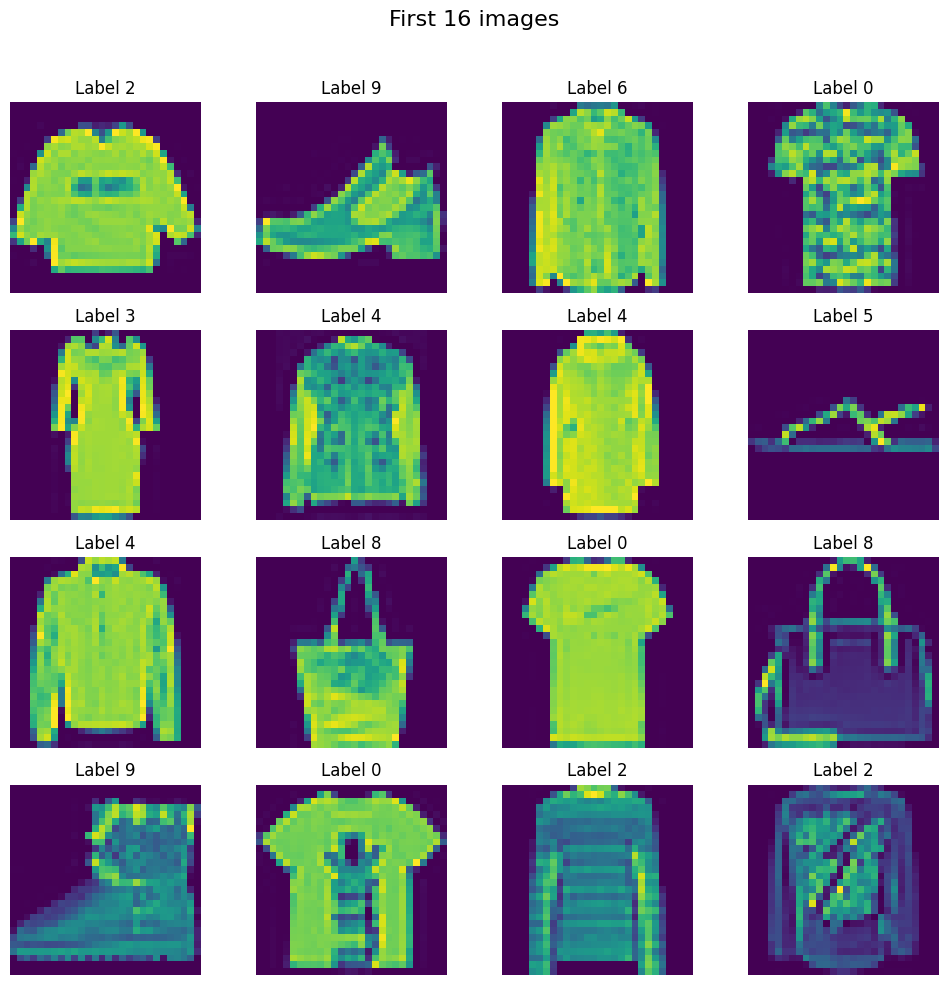

In [10]:
fig , axes  = plt.subplots(4,4,figsize = (10,10))
fig.suptitle("First 16 images"  ,fontsize = 16)

for i , ax in enumerate(axes.flat):
  img = data.iloc[i , 1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label {data.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [11]:
X = data.iloc[: , 1:].values
y = data.iloc[: , 0].values



In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [13]:
X_train = X_train / 255
X_test = X_test/255

In [14]:
class CustomDataset(Dataset):
  def __init__(self ,features, labels):
    self.features = torch.tensor(features , dtype = torch.float32)
    self.labels = torch.tensor(labels , dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self , idx):
    return self.features[idx] , self.labels[idx]

In [15]:


train_dataset  = CustomDataset(X_train , y_train)
test_dataset = CustomDataset(X_test , y_test)

In [56]:
import torch.nn as nn

class NN(nn.Module):
    def __init__(self, num_features):
        super(NN, self).__init__()

        layers = []
        input_dim = num_features
        hidden_dim = 120  # Neurons per hidden layer
        num_hidden_layers = 5

        # Input Layer
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.BatchNorm1d(hidden_dim))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(0.1))

        # Hidden Layers
        for _ in range(num_hidden_layers - 1):  # 5 hidden layers total
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.1))

        # Output Layer (Assuming 10 output classes)
        layers.append(nn.Linear(hidden_dim, 10))

        # Combine all layers into a Sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)



In [57]:
train_loader = DataLoader(train_dataset , batch_size = 16 , shuffle = True ,pin_memory=True)
test_loader = DataLoader(test_dataset , batch_size = 16 , shuffle = False , pin_memory=True)

In [58]:
model = NN(X_train.shape[1])
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.008672666599580775 , weight_decay= 0.00022408559780089356)


In [59]:
history = []
for epoch in range(epochs):
  epoch_loss = 0
  for batch_features , batch_labels in train_loader:
    batch_features = batch_features.to('cuda' if torch.cuda.is_available() else 'cpu')
    batch_labels = batch_labels.to('cuda' if torch.cuda.is_available() else 'cpu')
    optimizer.zero_grad()
    outputs = model(batch_features)
    loss = criterion(outputs , batch_labels)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
  avg_loss = epoch_loss / len(train_loader)
  history.append(avg_loss)
  print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [1/50], Loss: 0.8311
Epoch [2/50], Loss: 0.7656
Epoch [3/50], Loss: 0.7606
Epoch [4/50], Loss: 0.7432
Epoch [5/50], Loss: 0.7349
Epoch [6/50], Loss: 0.7385
Epoch [7/50], Loss: 0.7310
Epoch [8/50], Loss: 0.7355
Epoch [9/50], Loss: 0.7371
Epoch [10/50], Loss: 0.7306
Epoch [11/50], Loss: 0.7302
Epoch [12/50], Loss: 0.7304
Epoch [13/50], Loss: 0.7334
Epoch [14/50], Loss: 0.7295
Epoch [15/50], Loss: 0.7281
Epoch [16/50], Loss: 0.7257
Epoch [17/50], Loss: 0.7278
Epoch [18/50], Loss: 0.7284
Epoch [19/50], Loss: 0.7333
Epoch [20/50], Loss: 0.7321
Epoch [21/50], Loss: 0.7316
Epoch [22/50], Loss: 0.7288
Epoch [23/50], Loss: 0.7238
Epoch [24/50], Loss: 0.7280
Epoch [25/50], Loss: 0.7258
Epoch [26/50], Loss: 0.7229
Epoch [27/50], Loss: 0.7300
Epoch [28/50], Loss: 0.7283
Epoch [29/50], Loss: 0.7311
Epoch [30/50], Loss: 0.7241
Epoch [31/50], Loss: 0.7237
Epoch [32/50], Loss: 0.7249
Epoch [33/50], Loss: 0.7258
Epoch [34/50], Loss: 0.7266
Epoch [35/50], Loss: 0.7293
Epoch [36/50], Loss: 0.7294
E

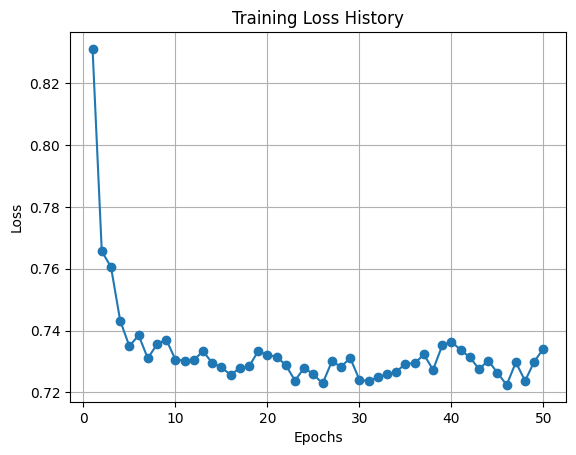

In [60]:
plt.plot(range(1, epochs+1), history, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.grid()
plt.show()


In [61]:
model.eval()

NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=120, bias=True)
    (1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=120, out_features=120, bias=True)
    (5): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=120, out_features=120, bias=True)
    (9): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=120, out_features=120, bias=True)
    (13): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.1, inplace=False)
    (16): Linear(in_features=120, out_features=120, bias=True)
    (17): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_runni

In [62]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features , batch_labels in test_loader:
    batch_features = batch_features.to('cuda' if torch.cuda.is_available() else 'cpu')
    batch_labels = batch_labels.to('cuda' if torch.cuda.is_available() else 'cpu')
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 79.37%


In [63]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features , batch_labels in train_loader:
    batch_features = batch_features.to('cuda' if torch.cuda.is_available() else 'cpu')
    batch_labels = batch_labels.to('cuda' if torch.cuda.is_available() else 'cpu')
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()
accuracy = correct / total
print(f"Train Accuracy: {accuracy * 100:.2f}%")

Train Accuracy: 80.10%
